# Bài 2.a Điều chế BFSK

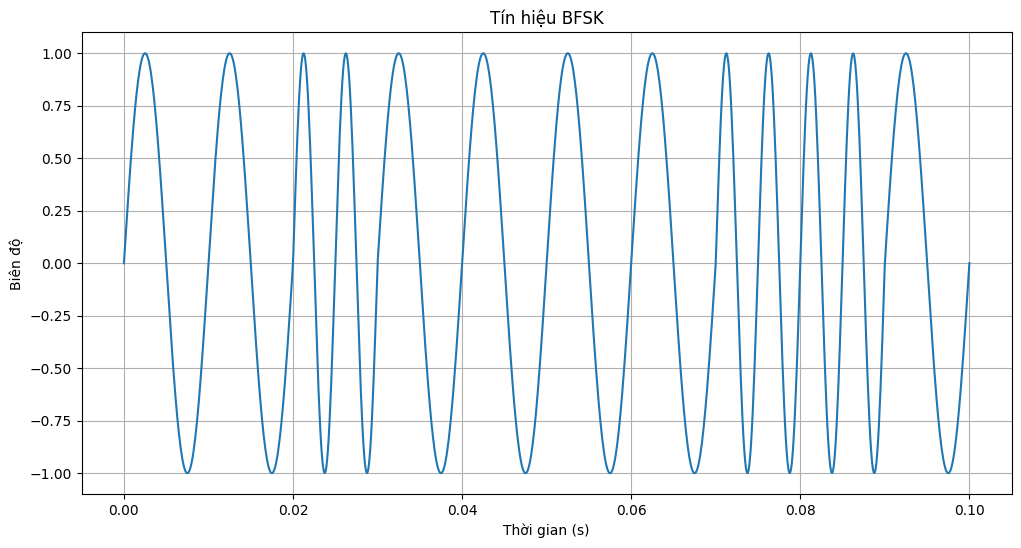

[1 1 0 1 1 1 1 0 0 1]


C:\Users\Admin\AppData\Local\Temp\ipykernel_21916\3077886213.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


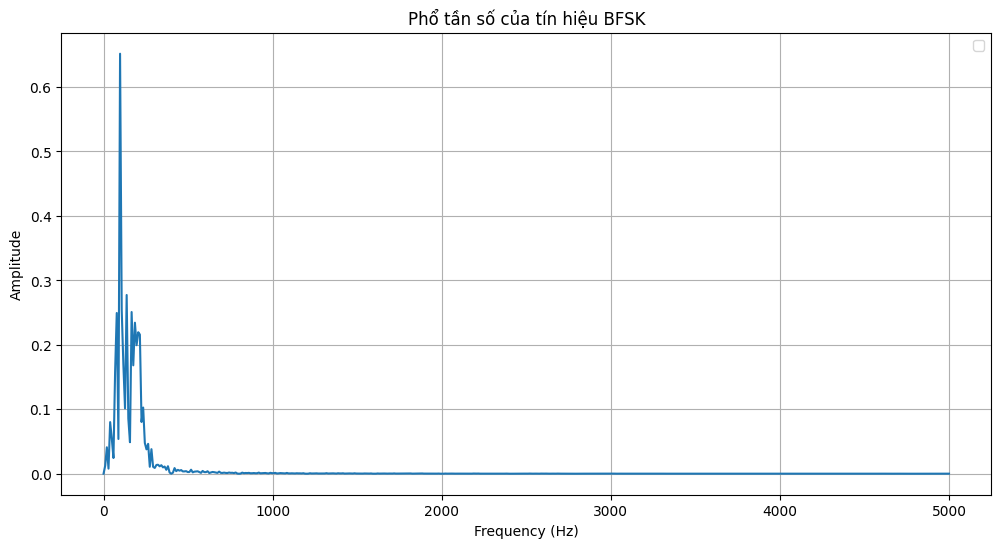

In [84]:
import numpy as np
import matplotlib.pyplot as plt
A = 1            
f_1 = 100       
f_2 = 200      
w0 = 0           
bit_rate = 100   
T_bit = 1 / bit_rate 
num_bits = 10  
time_per_bit = 100
Fs = 10000      
l_o = 0.5
An= 0.2

bits = np.random.randint(0, 2, num_bits)

# Hàm tạo tín hiệu BFSK

def BFSK(bits, A, f_1, f_2, w0, bit_rate, num_bits, time_per_bit, Fs):
    t = np.linspace(0, num_bits * T_bit, num_bits * time_per_bit)
    bfsk_signal = np.zeros(len(t))
    for i, bit in enumerate(bits):
        start = i * time_per_bit
        end = (i + 1) * time_per_bit
        if bit == 1:
            bfsk_signal[start:end] = A * np.sin(2 * np.pi * f_1 * t[start:end] + w0)
        else:
            bfsk_signal[start:end] = A * np.sin(2 * np.pi * f_2 * t[start:end] + w0)
    return t, bfsk_signal

## MỖI TÍN HIỆU BẰNG SỐ NGUYÊN LẦN TẦN SỐ SÓNG CƠ SỞ, Ở ĐÂY LÀ 2 LẦN
# BFSK câu a

t_a, bfsk_signal_a = BFSK(bits, A, f_1, f_2, w0, bit_rate, num_bits, time_per_bit, Fs)

# Vẽ đồ thị tín hiệu BFSK
plt.figure(figsize=(12, 6))
plt.plot(t, bfsk_signal_a)
plt.title("Tín hiệu BFSK")
plt.xlabel("Thời gian (s)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.show()

NFFT = 2**int(np.ceil(np.log2(len(bfsk_signal_a))))  
S = np.fft.fft(bfsk_signal_a, NFFT) / len(bfsk_signal_a) 
frequencies = Fs / 2 * np.linspace(0, 1, NFFT // 2 + 1) 
amplitude_spectrum = 2 * np.abs(S[:NFFT // 2 + 1])

print(bits)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude_spectrum)
plt.title("Phổ tần số của tín hiệu BFSK")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

# Bài 2.b

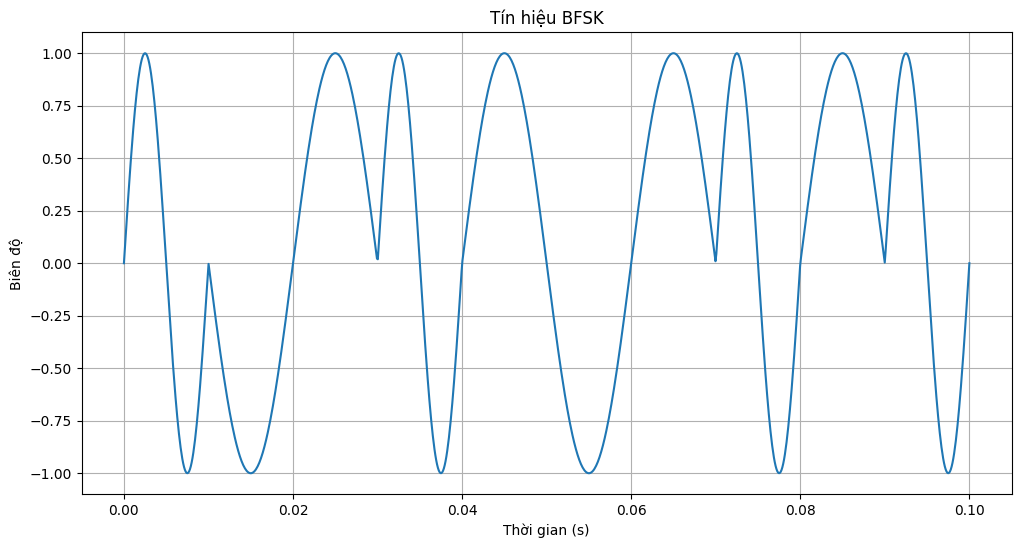

[0 1 1 0 1 1 1 0 1 0]


C:\Users\Admin\AppData\Local\Temp\ipykernel_21916\1113810049.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


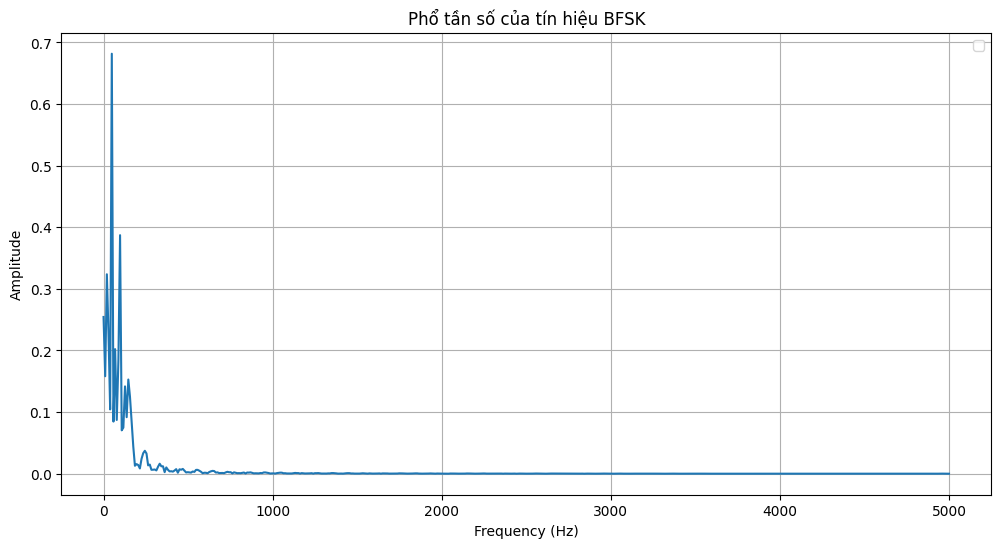

In [ ]:
f_1_b = 50
f_2_b = 100
# BFSK câu b

t_b, bfsk_signal_b = BFSK(bits, A, f_1_b, f_2_b, w0, bit_rate, num_bits, time_per_bit, Fs)

plt.figure(figsize=(12, 6))
plt.plot(t_b, bfsk_signal_b)
plt.title("Tín hiệu BFSK")

plt.xlabel("Thời gian (s)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.show()
print(bits)

NFFT = 2**int(np.ceil(np.log2(len(bfsk_signal_b))))
S = np.fft.fft(bfsk_signal_b, NFFT) / len(bfsk_signal_b)
frequencies = Fs / 2 * np.linspace(0, 1, NFFT // 2 + 1)
amplitude_spectrum = 2 * np.abs(S[:NFFT // 2 + 1])

plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude_spectrum)
plt.title("Phổ tần số của tín hiệu BFSK")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

# Bài 2.c

C:\Users\Admin\AppData\Local\Temp\ipykernel_21916\925597129.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


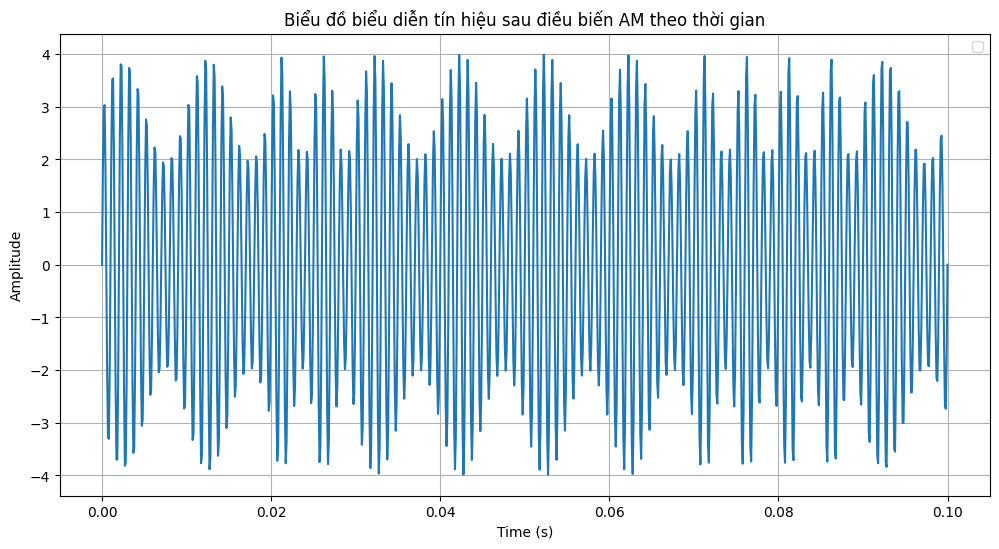

In [85]:
C = 3
fc = 2000
t_am = np.linspace(0, len(bits) * samples_per_bit / (samples_per_bit * max(f_1, f_2)), len(bfsk_signal_a))
m_t = (C + bfsk_signal_a) * np.sin(2 * np.pi * fc * t_am + w0)

# Biểu diễn tín hiệu AM trong miền thời gian
plt.figure(figsize=(12, 6))
plt.plot(t, m_t)
plt.title('Biểu đồ biểu diễn tín hiệu sau điều biến AM theo thời gian')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()


# Bài 2.D

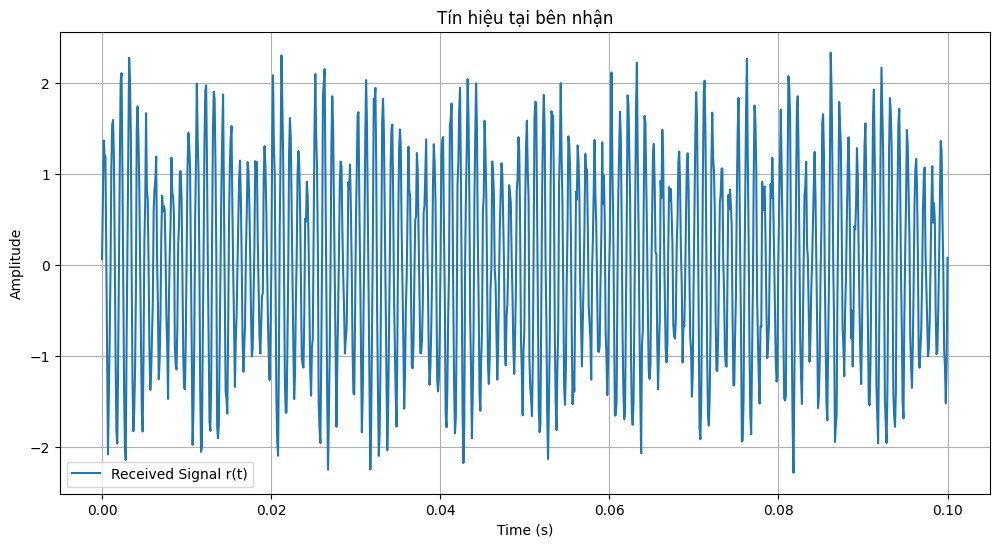

In [86]:
Nt = An * np.random.randn(len(m_t)) # Tạo nhiễu trắng

recieved_signal = l_o * (m_t) + Nt # l_o = 0.5

# Biểu diễn theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(t, recieved_signal, label='Received Signal r(t)')
plt.title('Tín hiệu tại bên nhận')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

# Phân tích phổ tần số của tín hiệu nhận
NFFT = 2**int(np.ceil(np.log2(len(recieved_signal))))  # Số điểm FFT
R = np.fft.fft(recieved_signal, NFFT) / len(recieved_signal)  # FFT tín hiệu và chuẩn hóa
frequencies = Fs / 2 * np.linspace(0, 1, NFFT // 2 + 1)  # Trục tần số
amplitude_spectrum = 2 * np.abs(R[:NFFT // 2 + 1])  # Phổ biên độ



# Bài 2.e

Text(0.5, 1.0, 'Tín hiệu AM sau khi được giải điều biến')

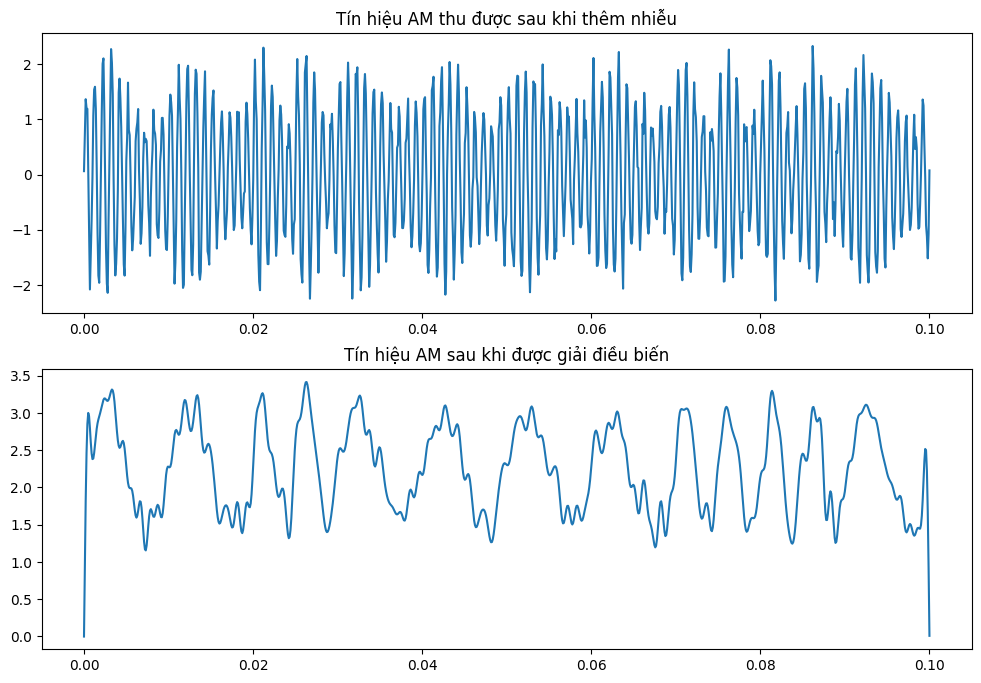

In [ ]:
from scipy import signal
from scipy.fft import fft, fftfreq

# Nhân tín hiệu với sóng mang ban đầu

receive_signal = recieved_signal * C * np.sin(2 * np.pi * fc * t_am)

cutoff = fc
fs = 10000
nyq =  fs
normal_cutoff = cutoff / nyq
order = 10
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

# Lọc tín hiệu
filtered_signal = signal.filtfilt(b, a, receive_signal)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, recieved_signal)
plt.title('Tín hiệu AM thu được sau khi thêm nhiễu')
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Tín hiệu AM sau khi được giải điều biến')


In [172]:
# Tính mức năng lượng -> check ngưỡng năng lương -> bit

# Giải điều biến BFSK
bit_rate = 100
Fs = 10000
time_per_bit = 100

## Thực hiên giải điều biến tín hiệu BFSK ban đầu
recovered_bits = []
def GDB_BFSK(signal, f1, f2, samples_per_bit):
    recovered_bits = []
    for i in range(0, len(signal), samples_per_bit):
        bit_signal = signal[i:i+samples_per_bit]
        energy_f1 = np.sum(bit_signal * np.sin(2 * np.pi * f1 * t[i:i+samples_per_bit]))
        energy_f2 = np.sum(bit_signal * np.sin(2 * np.pi * f2 * t[i:i+samples_per_bit]))
        recovered_bits.append(1 if energy_f1 > energy_f2 else 0)
    return np.array(recovered_bits)

recovered_data = GDB_BFSK(filtered_signal, f_1, f_2, samples_per_bit)

bit_errors = np.sum(bits != recovered_data)
bit_error_rate = bit_errors / len(data)

print(f"Dữ liệu gốc:       {bits}")
print(f"Dữ liệu khôi phục: {recovered_data}")
print(f"Tỷ lệ lỗi bit: {bit_error_rate:.2%}")

Dữ liệu gốc:       [1 1 0 1 1 1 1 0 0 1]
Dữ liệu khôi phục: [1 1 0 1 1 1 1 0 0 1]
Tỷ lệ lỗi bit: 0.00%


[inf, 19.754186988333057, 13.696802177976153, 10.03937112580658, 7.7666028435431365, 5.967393979705154, 4.1831711669258, 2.704093394358762, 1.370525038876419, 0.7690524076874373]


C:\Users\Admin\AppData\Local\Temp\ipykernel_21916\2827413155.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  snr_linear = signal_power / noise_power # Tính snr_linear


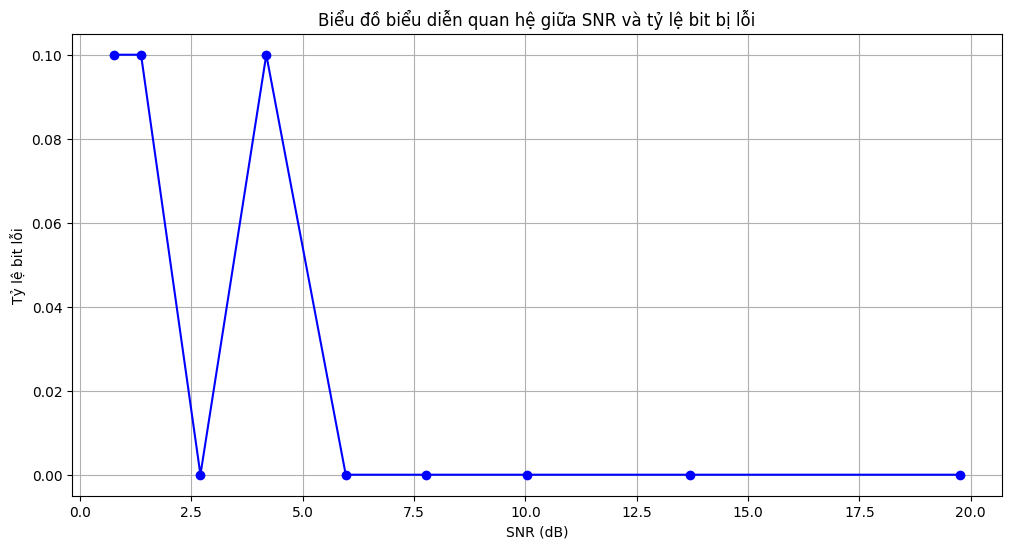

In [173]:
snr_values_db = []
def simulate_noise_effect(noise_levels):
    bit_error_rates = []
    for An in noise_levels:
        noise = An * np.random.randn(len(m_t))
        r_t = l_o * m_t + noise
        x_t = r_t * C * np.sin(2 * np.pi * fc * t_am)
        filtered_signal = signal.filtfilt(b, a, x_t)
        signal_power = np.mean((l_o * m_t) ** 2)  
        noise_power = np.mean(noise** 2)
        snr_linear = signal_power / noise_power # Tính snr_linear
        snr_db = 10 * np.log10(snr_linear)
        snr_values_db.append(snr_db)
        recovered_bits = []
        
        for i in range(0, len(filtered_signal), samples_per_bit):
            bit_signal = filtered_signal[i:i+samples_per_bit]
            energy_f1 = np.sum(bit_signal * np.sin(2 * np.pi * f_1 * t[i:i+samples_per_bit]))
            energy_f2 = np.sum(bit_signal * np.sin(2 * np.pi * f_2 * t[i:i+samples_per_bit]))
            recovered_bits.append(1 if energy_f1 > energy_f2 else 0)
        bit_errors =  np.sum(bits != np.array(recovered_bits))
        bit_error_rate = bit_errors / len(bits)
        bit_error_rates.append(bit_error_rate)

    return bit_error_rates

noise_levels = np.linspace(0, 1, 10)
bit_error_rates = simulate_noise_effect(noise_levels)
print(snr_values_db)
plt.figure(figsize=(12, 6))
plt.plot(snr_values_db, bit_error_rates, 'bo-')
plt.title('Biểu đồ biểu diễn quan hệ giữa SNR và tỷ lệ bit bị lỗi')
plt.xlabel('SNR (dB)')
plt.ylabel('Tỷ lệ bit lỗi')
plt.grid(True)
plt.show()